# 1.4. Tabela de Distribuição de Frequência


Creation on August 7 2021.

@author: Rogerio Chaves

E-mail: chaves.rogerio@outlook.com

__O que é uma Tabela de Distribuição de Frequência?__

Uma tabela de distribuição de frequência tem por objetivo organizar o conjunto de dados sobre uma variável em grupos (que será chamado de classes), onde a partir de suas frquências pode-se de obter algumas informações, de outra forma, "[...] conhecer o _comportamento_ dessa variável, analisando a ocorrência de suas possíveis realizações."(BUSSAB e MORETTIN, 2004)

Importar as bibliotecas

In [63]:
import numpy as np
import pandas as pd
from math import sqrt,ceil
from statistics import mean, median, mode, pstdev
import matplotlib.pyplot as plt
import matplotlib.style as style

style.use('seaborn-v0_8')

## Variável qualitativa nominal

Obter o conjunto de dados.

Neste exemplo trata-se de um conjunto de dados fictício sobre as marcas de uma amostra de 1140 carros da cidade A.

In [75]:
cars = pd.read_csv('datasets/veiculos.csv')
display(cars)

,Montadora,País
0,Honda,Japão
1,Honda,Japão
2,Ford,EUA
3,Toyota,Japão
4,Volkswagen,Alemanha
...,...,...
1135,Toyota,Japão
1136,Toyota,Japão
1137,BMW,Alemanha
1138,Toyota,Japão


A melhor forma de obter informações desse conjunto de dados é contruir diretamente a tabela de dados, porém com os dados ainda na forma bruta podemos obter a marca ou marcas de maior ocorrência a partir da moda.

In [76]:
manufacturer = mode(cars['Montadora'])
cars_number = cars['Montadora'].value_counts()[manufacturer]
print(f'Montadora com maior ocorrência: {manufacturer} - {cars_number} carros.')

Montadora com maior ocorrência: Chevrolet - 167 carros.


Vemos que para esse conjunto de dados a marca Chevrolet é a que tem maior ocorrência em todo o conjunto.

Para construir a tabela de distribuição de frequência precisamos compreender a classificação da nossa variável, recomenda-se a leitura do _notebook_ sobre classificação de variáveis <link>. A variável do exemplo dado, sobre as marcas de uma amostra de 1140 carros da cidade A, é uma variável do tipo qualitativa nominal.

Por se tratar de uma varável qualitativa não calcularemos o número de classes e a amplitude total, pois utilizaremos as marcas como classes. Cabe destacar que poderiamos agrupar os dados a partir de outras informações, por exemplo, pais de origem, continente de origem e etc.

In [77]:
manufacturers_brands = cars['Montadora'].unique()
manufacturers_brands

array(['Honda', 'Ford', 'Toyota', 'Volkswagen', 'Nissan', 'Fiat', 'Jeep',
       'Chevrolet', 'Volvo', 'BMW', 'Chery', 'JAC', 'Hyundai',
       'Mercedes-Benz', 'Renault', 'Kia', 'Citroen', 'Peugeot'],
      dtype=object)

In [78]:
manufacturers_brands.sort()
manufacturers_brands

array(['BMW', 'Chery', 'Chevrolet', 'Citroen', 'Fiat', 'Ford', 'Honda',
       'Hyundai', 'JAC', 'Jeep', 'Kia', 'Mercedes-Benz', 'Nissan',
       'Peugeot', 'Renault', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object)

In [79]:
#fi: absolute frequency
fi_cars = {}
for value in manufacturers_brands:
    frequency = 0
    for car in cars['Montadora']:
        if car == value:
            frequency += 1
    fi_cars[value] = frequency

In [80]:
index_cars = list(fi_cars.keys())

In [81]:
data_cars = list(fi_cars.values())

In [82]:
fi_relative = []
for value in data_cars:
    element = np.around((value / sum(data_cars)), 2)
    element = element * 100
    fi_relative.append(element)

Como se trata de uma variável qualitativa nominal, as informações sobre as frequências acumuladas não trarão informações relevantes para a análise, por isso não serão calculadas e não serão inseridas na tabela de frequência.

In [83]:
frequency_distribution = pd.DataFrame(index=index_cars, data=data_cars, columns=['Fi'])
frequency_distribution['Fi (%)'] = fi_relative

In [84]:
frequency_distribution

,Fi,Fi (%)
BMW,24,2.0
Chery,6,1.0
Chevrolet,167,15.0
Citroen,26,2.0
Fiat,111,10.0
Ford,67,6.0
Honda,100,9.0
Hyundai,116,10.0
JAC,8,1.0
Jeep,42,4.0


Criar um gráfico em barras com as informações da tabela.

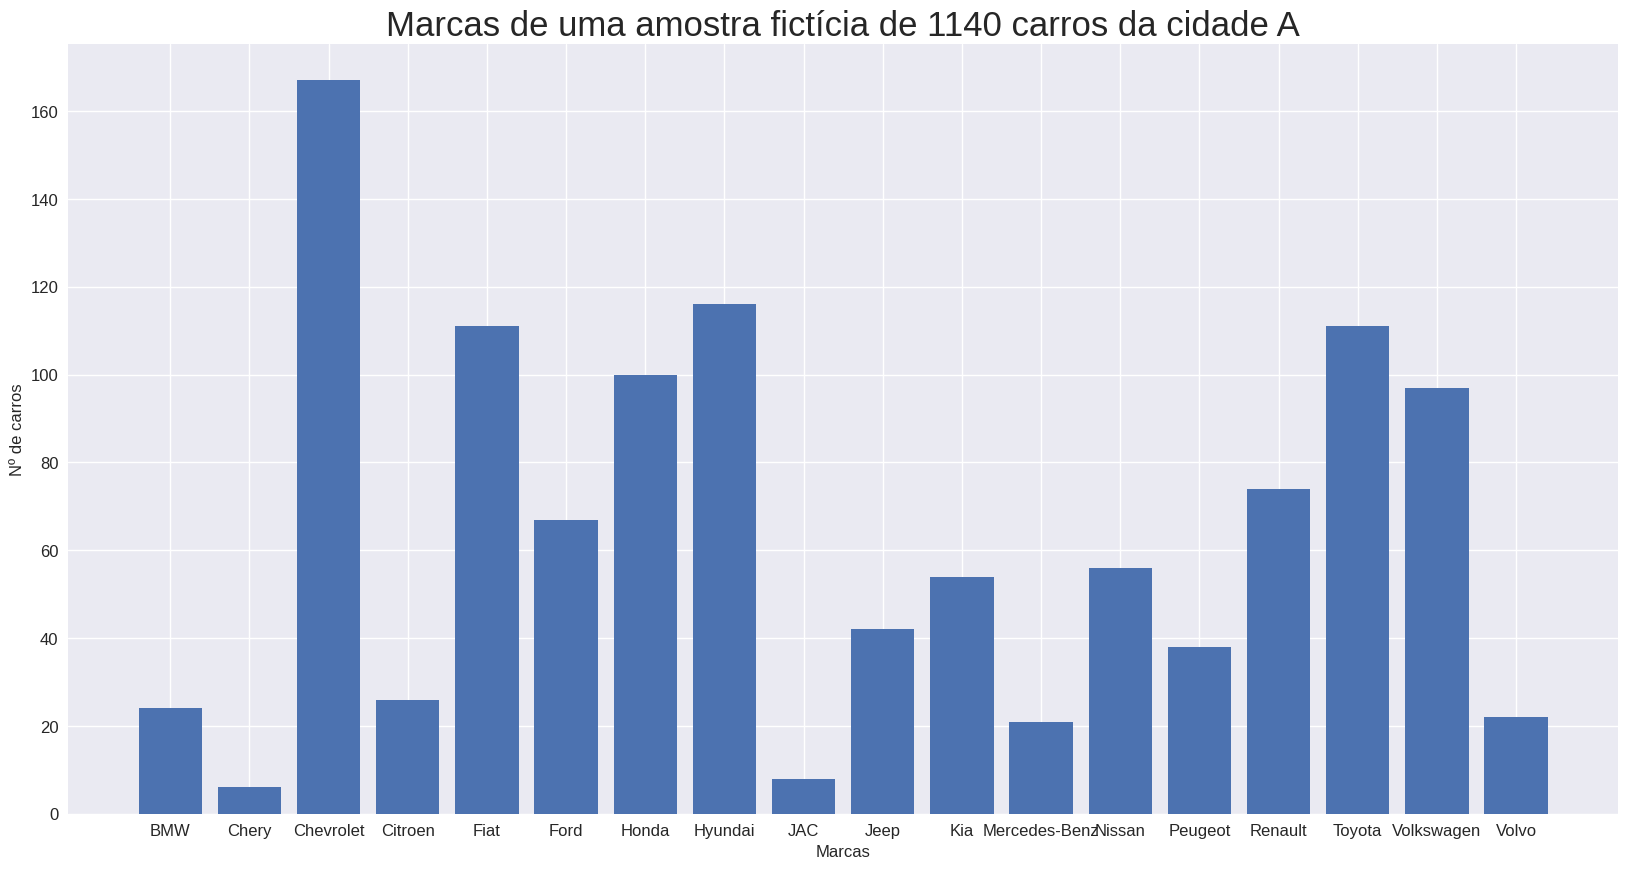

In [86]:
plt.figure(figsize=(20,10))
plt.bar(frequency_distribution.index, frequency_distribution['Fi'])
plt.title('Marcas de uma amostra fictícia de 1140 carros da cidade A', fontsize=25)
plt.ylabel('Nº de carros', fontsize=12)
plt.xlabel('Marcas', fontsize=12)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.show()

Podemos visualizar a confirmação do valor da moda onde a marca Chevrolet é a que possui mais ocorrência no conjunto de dados. Alem disso, vemos que as 05 marcas com maior ocorrência no conjunto de dados são: 

In [87]:
frequency_distribution['Fi'].sort_values(ascending=False).head(5)

Chevrolet    167
Hyundai      116
Fiat         111
Toyota       111
Honda        100
Name: Fi, dtype: int64

In [88]:
frequency_distribution['Fi'].sort_values().head(5)

Chery             6
JAC               8
Mercedes-Benz    21
Volvo            22
BMW              24
Name: Fi, dtype: int64

Através da tabela podemos obter mais informações, por exemplo:

Quais marcas aparecem no conjunto de dados mais de 75 vezes.

In [90]:
frequency_distribution['Fi'][frequency_distribution['Fi'] > 75].sort_values(ascending=False)

Chevrolet     167
Hyundai       116
Fiat          111
Toyota        111
Honda         100
Volkswagen     97
Name: Fi, dtype: int64

Quais marcas aparecem no conjunto de dados menos de 20 vezes

In [91]:
frequency_distribution['Fi'][frequency_distribution['Fi'] < 20].sort_values(ascending=False)

JAC      8
Chery    6
Name: Fi, dtype: int64

Quantas e quais marcas tem participação maior ou igual a 10% no conjunto de dados.

In [92]:
frequency_distribution['Fi (%)'][frequency_distribution['Fi (%)'] >= 10].sort_values(ascending=False)

Chevrolet    15.0
Fiat         10.0
Hyundai      10.0
Toyota       10.0
Name: Fi (%), dtype: float64

## Referências:

BUSSAB, Wilton de O.; MORETTIN, Pedro A. Estatística Básica. 5ª edição. São Paulo: Editora Saraiva, 2004.